In [2]:
import yfinance as yf
#this package calls the yahoo finance api to download daily stock and index prices

In [5]:
sp500=yf.Ticker("^GSPC")
# this class will enable us to download price history for a single symbol
# here we are using gspc symbol

In [6]:
sp500=sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,5725.149902,5741.430176,5696.509766,5712.689941,3602060000,0.0,0.0
2024-11-05 00:00:00-05:00,5722.430176,5783.439941,5722.100098,5782.759766,3768310000,0.0,0.0
2024-11-06 00:00:00-05:00,5864.890137,5936.140137,5864.890137,5929.040039,6329530000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-10-28 00:00:00-04:00', '2024-10-29 00:00:00-04:00',
               '2024-10-30 00:00:00-04:00', '2024-10-31 00:00:00-04:00',
               '2024-11-01 00:00:00-04:00', '2024-11-04 00:00:00-05:00',
               '2024-11-05 00:00:00-05:00', '2024-11-06 00:00:00-05:00',
               '2024-11-07 00:00:00-05:00', '2024-11-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24332, freq=None)

## Cleaning and visualizing our stock market data

<Axes: xlabel='Date'>

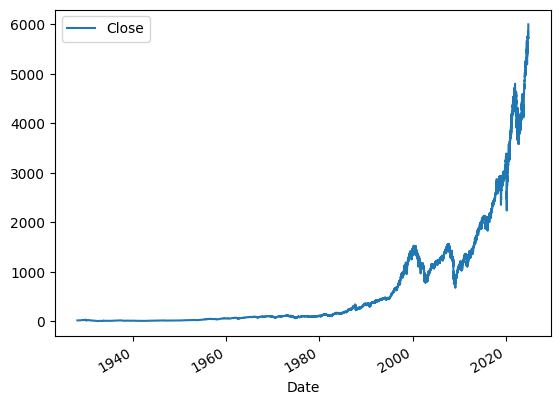

In [8]:
sp500.plot.line(y="Close",use_index=True)

In [ ]:
del sp500["Dividends"] # these both are unneccessary columns for our prediction model
del sp500["Stock Splits"]

## Setting up our target for machine learning

In [10]:
# we are predicting whether the stock price will go up or down tommorow
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,5725.149902,5741.430176,5696.509766,5712.689941,3602060000,5782.759766
2024-11-05 00:00:00-05:00,5722.430176,5783.439941,5722.100098,5782.759766,3768310000,5929.040039
2024-11-06 00:00:00-05:00,5864.890137,5936.140137,5864.890137,5929.040039,6329530000,5973.100098


In [12]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,5725.149902,5741.430176,5696.509766,5712.689941,3602060000,5782.759766,1
2024-11-05 00:00:00-05:00,5722.430176,5783.439941,5722.100098,5782.759766,3768310000,5929.040039,1
2024-11-06 00:00:00-05:00,5864.890137,5936.140137,5864.890137,5929.040039,6329530000,5973.100098,1


In [14]:
sp500=sp500.loc["1990-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,5725.149902,5741.430176,5696.509766,5712.689941,3602060000,5782.759766,1
2024-11-05 00:00:00-05:00,5722.430176,5783.439941,5722.100098,5782.759766,3768310000,5929.040039,1
2024-11-06 00:00:00-05:00,5864.890137,5936.140137,5864.890137,5929.040039,6329530000,5973.100098,1


In [17]:
# Step 5: Select features and target variable
features = sp500[["Open", "High", "Low", "Close", "Volume"]]
target = sp500["Target"]

# Display feature and target samples
print(features.head())



                                 Open        High         Low       Close  \
Date                                                                        
1990-01-02 00:00:00-05:00  353.399994  359.690002  351.980011  359.690002   
1990-01-03 00:00:00-05:00  359.690002  360.589996  357.890015  358.760010   
1990-01-04 00:00:00-05:00  358.760010  358.760010  352.890015  355.670013   
1990-01-05 00:00:00-05:00  355.670013  355.670013  351.350006  352.200012   
1990-01-08 00:00:00-05:00  352.200012  354.239990  350.540009  353.790009   

                              Volume  
Date                                  
1990-01-02 00:00:00-05:00  162070000  
1990-01-03 00:00:00-05:00  192330000  
1990-01-04 00:00:00-05:00  177000000  
1990-01-05 00:00:00-05:00  158530000  
1990-01-08 00:00:00-05:00  140110000  


In [18]:
print(target.head())

Date
1990-01-02 00:00:00-05:00    0
1990-01-03 00:00:00-05:00    0
1990-01-04 00:00:00-05:00    0
1990-01-05 00:00:00-05:00    1
1990-01-08 00:00:00-05:00    0
Name: Target, dtype: int32


In [ ]:
#  Import the train_test_split function and split data
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (7025, 5)
Testing set shape: (1757, 5)


In [ ]:
#  Import RandomForestClassifier and train the model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Import evaluation metrics and evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
predictions = model.predict(X_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy Score: 0.5298804780876494
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47       822
           1       0.55      0.60      0.58       935

    accuracy                           0.53      1757
   macro avg       0.53      0.53      0.52      1757
weighted avg       0.53      0.53      0.53      1757

Confusion Matrix:
 [[371 451]
 [375 560]]


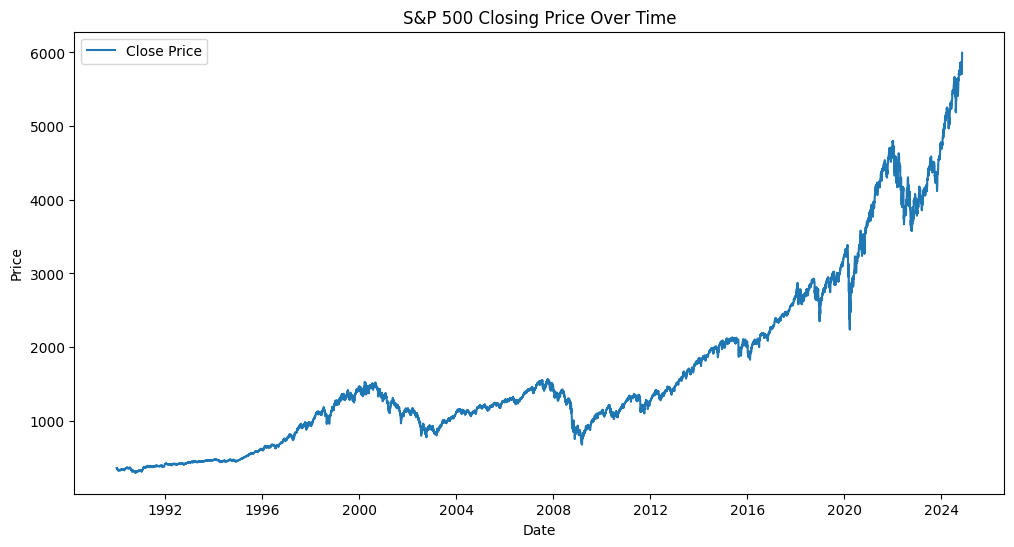

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Close"], label="Close Price")
plt.title("S&P 500 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

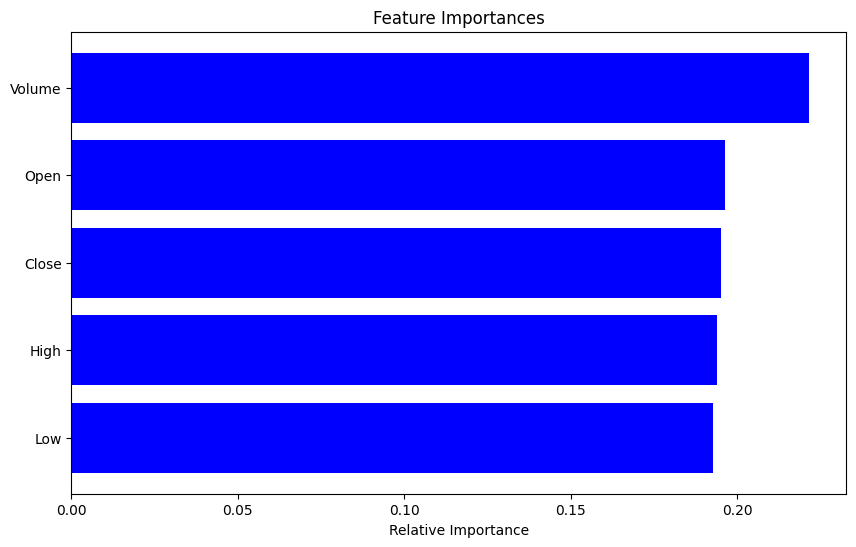

In [24]:
# Plot feature importances from the Random Forest model
import numpy as np
importances = model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


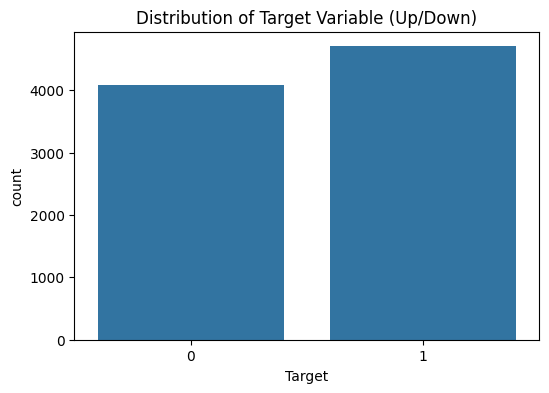

In [25]:
# Plot the distribution of the Target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=sp500["Target"])
plt.title("Distribution of Target Variable (Up/Down)")
plt.show()